In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 
               31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 
               34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 
               38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 
               11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 
               500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 
               610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 
               714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 
               7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [4]:
import numpy as np

In [5]:
# (방법2)
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]

print(len(fish_data))

49


In [8]:
fish_data = np.column_stack((fish_length, fish_weight))
print(len(fish_data))

49


In [9]:
fish_target = [1] * 35 + [0] * 14
print(len(fish_target))
print(fish_target)

49
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [10]:
# 넘파이로 만드는 방식
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(len(fish_target))
print(fish_target)

49
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### 훈련 및 테스트 데이터 분리하기
##### - 데이터 분리와 섞는 작업을 동시에 진행

In [11]:
### 사이킷런 패키지 중에 훈련 및 테스트 데이터 분리 함수 사용
from sklearn.model_selection import train_test_split

In [16]:
### train_test_split()
# - 첫번째 값 : 독립변수 데이터셋
# - 두번째 값 : 종속변수 데이터셋
# - test_size : train 및 test 로 분류할 비율
#               테스트사이즈의 비율을 25%로, 훈련은 75%로가 됨
# - random_state : 랜덤하게 섞기 위한 규칙값
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, test_size=0.25, random_state=42)

In [17]:
### 훈련데이터 차원확인
print(train_input.shape, train_target.shape)

(36, 2) (36,)


In [18]:
### 테스트데이터 차원확인
print(test_input.shape, test_target.shape)

(13, 2) (13,)


In [21]:
### 데이터의 편향 확인 : 종속데이터로 확인하면 됨
test_target
#train_target
# (해석)
# - 1번(도미) 데이터로 집중되는 편향을 보임
# - 이에 대한 편향 해소가 필요함

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [27]:
### stratify 
# - 편향성을 개선하는데 사용하는 속성
# - 값은 종속변수(target) 값을 사용함
# - target 데이터의 범주의 비율을 고려하여 분류 시킴

train_input, test_input, train_target, test_target = \
              train_test_split(fish_data, fish_target, 
                               stratify = fish_target,
                               test_size=0.25, random_state=42)

In [24]:
### 훈련데이터 차원확인
print(train_input.shape, train_target.shape)

(36, 2) (36,)


In [25]:
### 테스트데이터 차원확인
print(test_input.shape, test_target.shape)

(13, 2) (13,)


In [28]:
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [29]:
train_target

array([1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1.])

### 임의의 데이터 예측(분류)하기

In [ ]:
### 임의 데이터
# - 길이는 25cm,
# - 무게는 150g
# 어떤 생선일까?

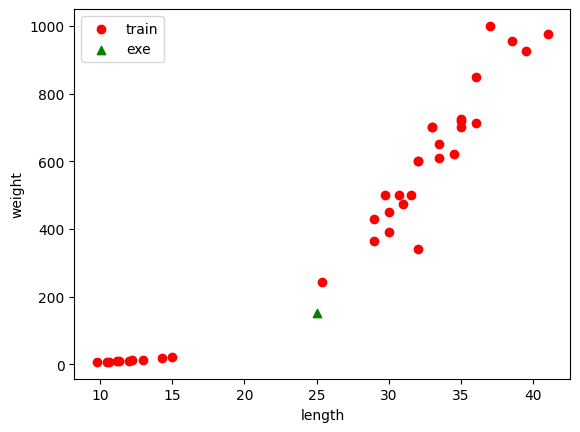

In [37]:
### train, 임의데이터를 산점도로 그리기

import matplotlib.pyplot as plt

### 산점도(scatter) 시각화 그리기
# - 훈련데이터 
plt.scatter(train_input[:, 0], train_input[:, 1], c="red", label="train")
# - 테스트 데이터
#plt.scatter(test_input[:, 0], test_input[:, 1], c="blue", label="test")
# - 임의 생선 한개 추가
plt.scatter(25, 150, c="green", label="exe", marker="^") 

plt.xlabel("length")
plt.ylabel("weight")

# - 범주 추가
plt.legend()

plt.show()

In [32]:
### 패키지 import
from sklearn.neighbors import KNeighborsClassifier

In [34]:
### 훈련시키기 (훈련데이터 사용), 이웃갯수는 기본값(5)
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [35]:
### 정확도 확인 (테스트 데이터)
kn.score(test_input, test_target)

1.0

In [36]:
### 예측하기 (임의 데이터)
kn.predict([[25, 150]]) 

### 해석 :  0은 빙어를 의미함

array([0.])

In [41]:
### 사용된 이웃 확인하기 
# distances : 이웃에 사용된 특성 까지의 거리
# indexs : 이웃에 사용된 독립변수의 인덱스 위치 값
distances, indexs = kn.kneighbors([[25,150]])
print(distances, indexs)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]] [[21 33 19 30  1]]


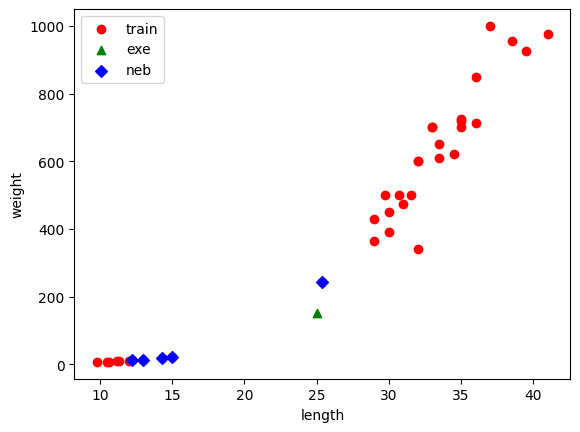

In [42]:
### train, 임의데이터를 산점도로 그리기

import matplotlib.pyplot as plt

### 산점도(scatter) 시각화 그리기
# - 훈련데이터 
plt.scatter(train_input[:, 0], train_input[:, 1], c="red", label="train") 

# - 임의 생선 한개 추가
plt.scatter(25, 150, c="green", label="exe", marker="^") 

# - 이웃의 특성
plt.scatter(train_input[indexs, 0], train_input[indexs, 1], c="blue", label="neb", marker="D") 

plt.xlabel("length")
plt.ylabel("weight")

# - 범주 추가
plt.legend()

plt.show()

In [43]:
train_target[indexs]

array([[1., 0., 0., 0., 0.]])

### x축과 y축의 범위 단위가 크게 차이남
##### - x축과 y축의 범위를 동일하게 한 후 확인

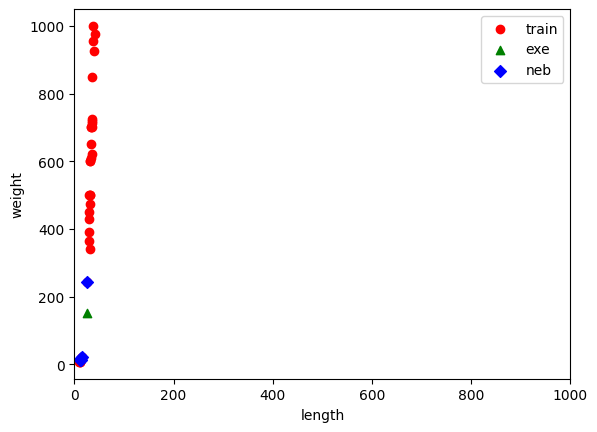

In [45]:
### train, 임의데이터를 산점도로 그리기

import matplotlib.pyplot as plt

### 산점도(scatter) 시각화 그리기
# - 훈련데이터 
plt.scatter(train_input[:, 0], train_input[:, 1], c="red", label="train") 

# - 임의 생선 한개 추가
plt.scatter(25, 150, c="green", label="exe", marker="^") 

# - 이웃의 특성
plt.scatter(train_input[indexs, 0], train_input[indexs, 1], c="blue", label="neb", marker="D") 


### - x축의 값의 범위를 y축과 동일하게 처리
plt.xlim(0, 1000)

plt.xlabel("length")
plt.ylabel("weight")

# - 범주 추가
plt.legend()

plt.show()

### 스케일 맞추기 : 정규화(표준화) 라고 칭함

In [ ]:
### 정규화 : 표준점수(standard score)를 사용
# - 표준점수 : 각 데이터가 원점(0)에서 몇 표준편차 만큼 떨어져
#              있는지를 나타냄
# - 표준점수 = (각 데이터 - 데이터셋 전체평균) / 데이터셋 전체 표준편차
# - 평균 및 표준편차는 numpy 의 함수 사용

In [46]:
### 길이와 무게 각각에 대한 전체 평균 구하기
# axis = 0 : 행단위, axis = 1 : 열단위
mean = np.mean(train_input, axis = 0)
mean

array([ 27.29722222, 454.09722222])

In [47]:
### 길이와 무게 각각에 대한 전체 표준편차 구하기
std = np.std(train_input, axis = 0)
std

array([  9.98244253, 323.29893931])

In [48]:
### 표준점수 계산하기
train_scaled = (train_input - mean) / std
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

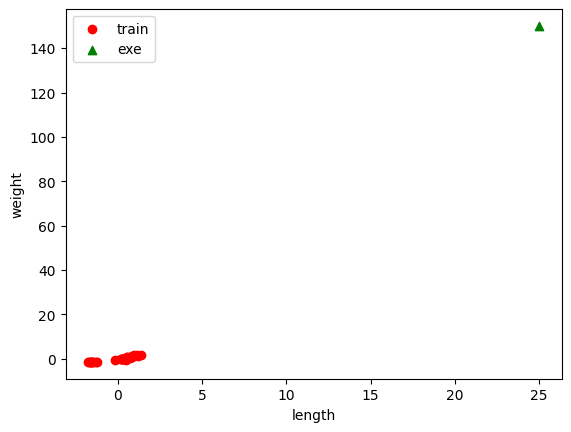

In [50]:
### train, 임의데이터를 산점도로 그리기

import matplotlib.pyplot as plt

### 산점도(scatter) 시각화 그리기
# - 훈련데이터 
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], c="red", label="train") 

# - 임의 생선 한개 추가
plt.scatter(25, 150, c="green", label="exe", marker="^") 

plt.xlabel("length")
plt.ylabel("weight")

# - 범주 추가
plt.legend()

plt.show()

In [51]:
### 임의 데이터도 표준화 시키기
# - 훈련데이터 표준화가 진행되면
# - 임의 데이터 및 테스트 데이터도 표준화 해야함
new = ([25, 150] - mean) / std
new

array([-0.23012627, -0.94060693])

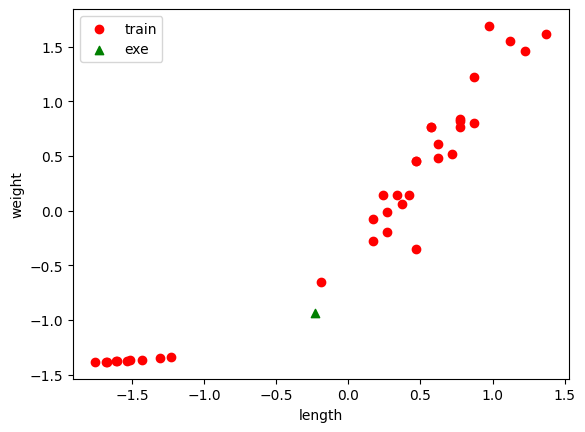

In [52]:
### train, 임의데이터를 산점도로 그리기

import matplotlib.pyplot as plt

### 산점도(scatter) 시각화 그리기
# - 훈련데이터 
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], c="red", label="train") 

# - 임의 생선 한개 추가
plt.scatter(new[0], new[1], c="green", label="exe", marker="^") 

plt.xlabel("length")
plt.ylabel("weight")

# - 범주 추가
plt.legend()

plt.show()

In [57]:
### 훈련/정확도/예측하기
# - 훈련 시키기 
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [58]:
### 정확도 확인
# - 테스트 데이터 정규화해서 사용
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

In [60]:
### 예측(분류)하기
kn.predict([new])

array([1.])

In [67]:
### 사용된 이웃 확인하기 
# distances : 이웃에 사용된 특성 까지의 거리
# indexs : 이웃에 사용된 독립변수의 인덱스 위치 값
distances, indexs = kn.kneighbors([new])
indexs

array([[21, 14, 34, 32,  5]], dtype=int64)

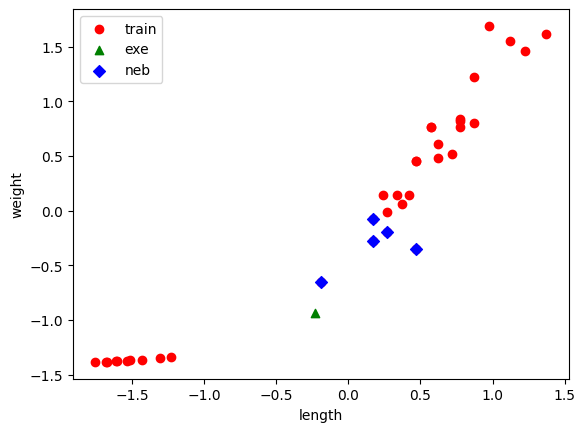

In [66]:
### train, 임의데이터를 산점도로 그리기

import matplotlib.pyplot as plt

### 산점도(scatter) 시각화 그리기
# - 훈련데이터 
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], c="red", label="train") 

# - 임의 생선 한개 추가
plt.scatter(new[0], new[1], c="green", label="exe", marker="^") 

# - 이웃의 특성
plt.scatter(train_scaled[indexs, 0], train_scaled[indexs, 1], c="blue", label="neb", marker="D") 


plt.xlabel("length")
plt.ylabel("weight")

# - 범주 추가
plt.legend()

plt.show()